# California Housing Price Predictor
---

![California Housing Prices](/Users/khaledalrashidi/Desktop/ML-Projects/California-Housing-Price-Predictor/images/housing_price.jpg)

## Overview

##### The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

##### The project follows these steps:

1.	**Data Loading and Splitting**: The dataset is loaded and split into training and testing sets to ensure a clean separation of data for model evaluation.

2.	**Exploratory Data Analysis (EDA)**: EDA is performed on the training set to understand the data distribution and relationships between features.

3.	**Data Preprocessing**: Key preprocessing steps include handling skewed features through logarithmic transformations and encoding categorical variables.

4.	**Feature Engineering**: New features are created to enhance the model’s predictive power.
	
5.	**Model Training and Evaluation**: Two models are trained and evaluated - a Linear Regression model and a Random Forest Regressor. The models are assessed based on their performance on the test set.
---

## Import Libaries
---

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading 
---

In [18]:
data = pd.read_csv("housing.csv")
data.shape

(20640, 10)

## Data: First Look
---

In [19]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- We can see that that in the column 'total_bedrooms', there is about 200 null-value data points. 

- We can either impute them with the median or drop the rows. Either approach would work for our task.

In [21]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
data.dropna(inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Split the data set into train and test sets

In [24]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14020,-117.16,32.74,27.0,2335.0,604.0,982.0,590.0,3.1921,NEAR OCEAN,261500.0
9947,-122.35,38.30,18.0,3735.0,557.0,1504.0,521.0,5.6304,NEAR BAY,243100.0
20552,-121.80,38.68,11.0,3851.0,892.0,1847.0,747.0,3.4331,INLAND,120600.0
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND,114100.0
7746,-118.15,33.93,34.0,1745.0,404.0,1084.0,410.0,3.3411,<1H OCEAN,220500.0
...,...,...,...,...,...,...,...,...,...,...
13553,-117.31,34.11,41.0,1105.0,257.0,816.0,197.0,1.9375,INLAND,64100.0
7552,-118.18,33.91,41.0,1260.0,299.0,1535.0,322.0,3.0134,<1H OCEAN,128100.0
11956,-117.45,33.92,35.0,2552.0,588.0,1840.0,551.0,2.2548,INLAND,113300.0
20110,-120.20,37.84,9.0,13670.0,2453.0,2811.0,1193.0,3.2589,INLAND,137900.0


## Exploratory Data Analysis (EDA)

- Let’s explore the training data to understand its distribution and relationships.
---

### Visualizing Data Distribution

- We’ll create histograms to visualize the distribution of various features.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

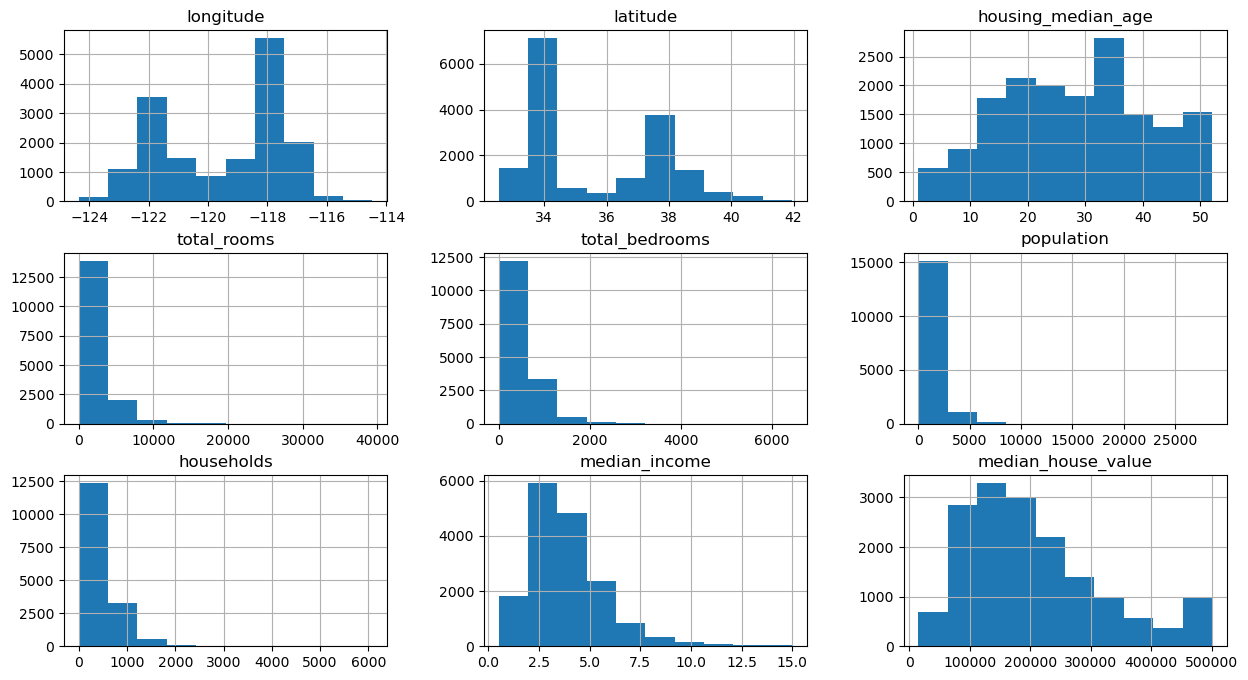

In [25]:
train_data.hist(figsize=(15,8))

### Correlation Matrix
- We drop the non-numeric column ‘ocean_proximity’ temporarily to plot a heatmap of the correlation matrix.

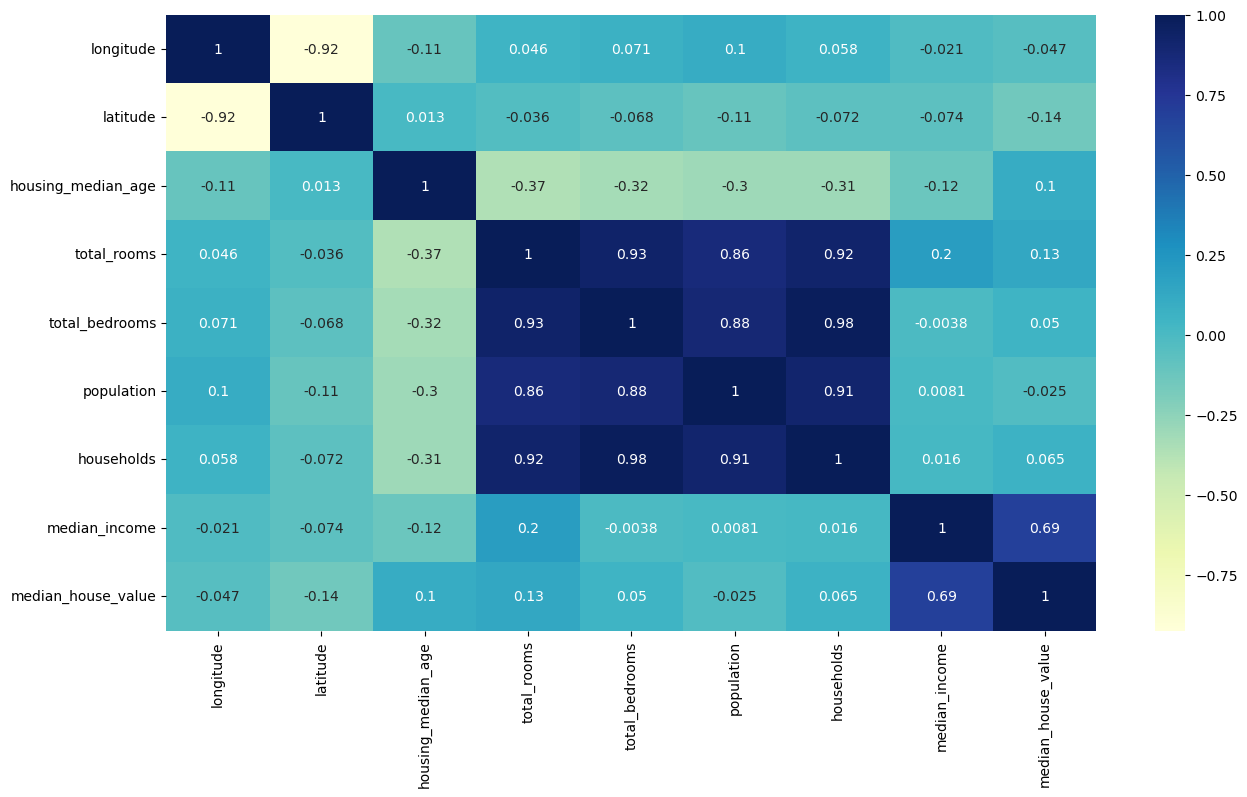

In [26]:
temp_train_data = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(temp_train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Data Preprocessing
- We apply logarithmic transformation to certain skewed features to normalize their distribution.
---

In [27]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

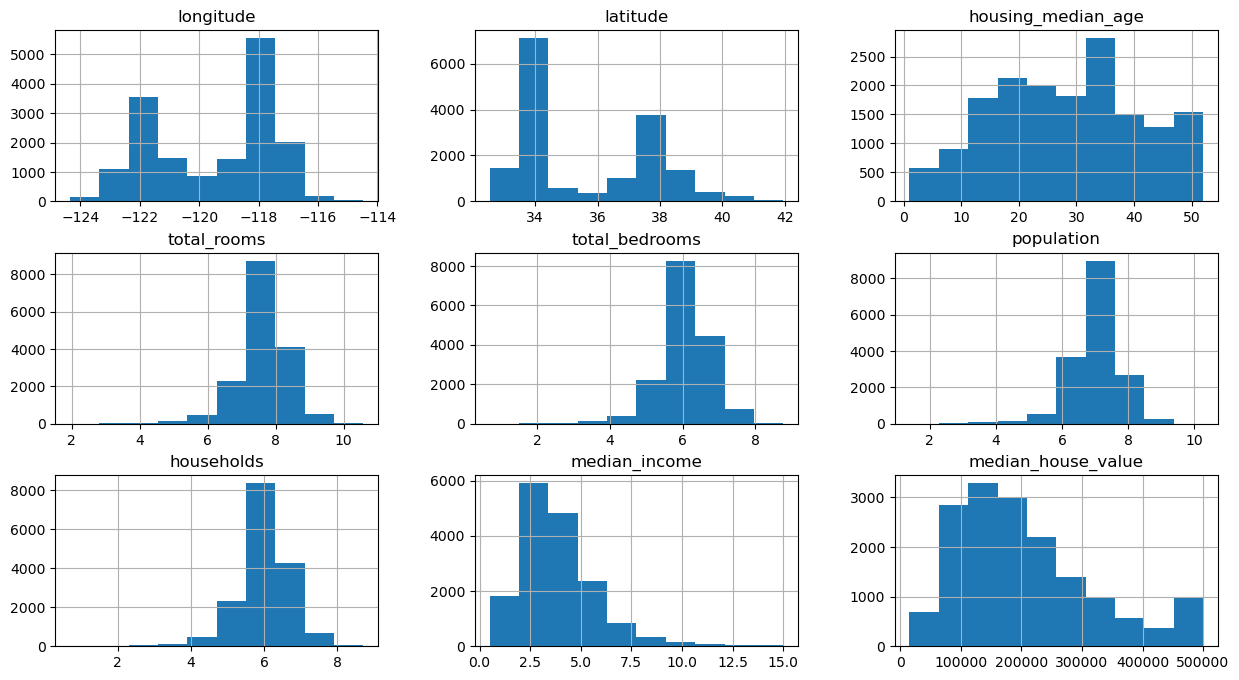

In [28]:
train_data.hist(figsize=(15,8))
plt.show()

### Encoding Categorical Features
- We encode the categorical feature ‘ocean_proximity’ using one-hot encoding.

In [29]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7196
INLAND        5199
NEAR OCEAN    2123
NEAR BAY      1824
ISLAND           4
Name: count, dtype: int64

In [30]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [31]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14020,-117.16,32.74,27.0,7.756195,6.405228,6.890609,6.381816,3.1921,261500.0,False,False,False,False,True
9947,-122.35,38.30,18.0,8.225771,6.324359,7.316548,6.257668,5.6304,243100.0,False,False,False,True,False
20552,-121.80,38.68,11.0,8.256348,6.794587,7.521859,6.617403,3.4331,120600.0,False,True,False,False,False
12754,-121.37,38.61,39.0,6.714171,4.990433,5.799093,4.976734,3.0833,114100.0,False,True,False,False,False
7746,-118.15,33.93,34.0,7.465083,6.003887,6.989335,6.018593,3.3411,220500.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13553,-117.31,34.11,41.0,7.008505,5.552960,6.705639,5.288267,1.9375,64100.0,False,True,False,False,False
7552,-118.18,33.91,41.0,7.139660,5.703782,7.336937,5.777652,3.0134,128100.0,True,False,False,False,False
11956,-117.45,33.92,35.0,7.845024,6.378426,7.518064,6.313548,2.2548,113300.0,False,True,False,False,False
20110,-120.20,37.84,9.0,9.523032,7.805475,7.941651,7.085064,3.2589,137900.0,False,True,False,False,False


### Updated Correlation Matrix

- After preprocessing, we plot the updated correlation matrix.

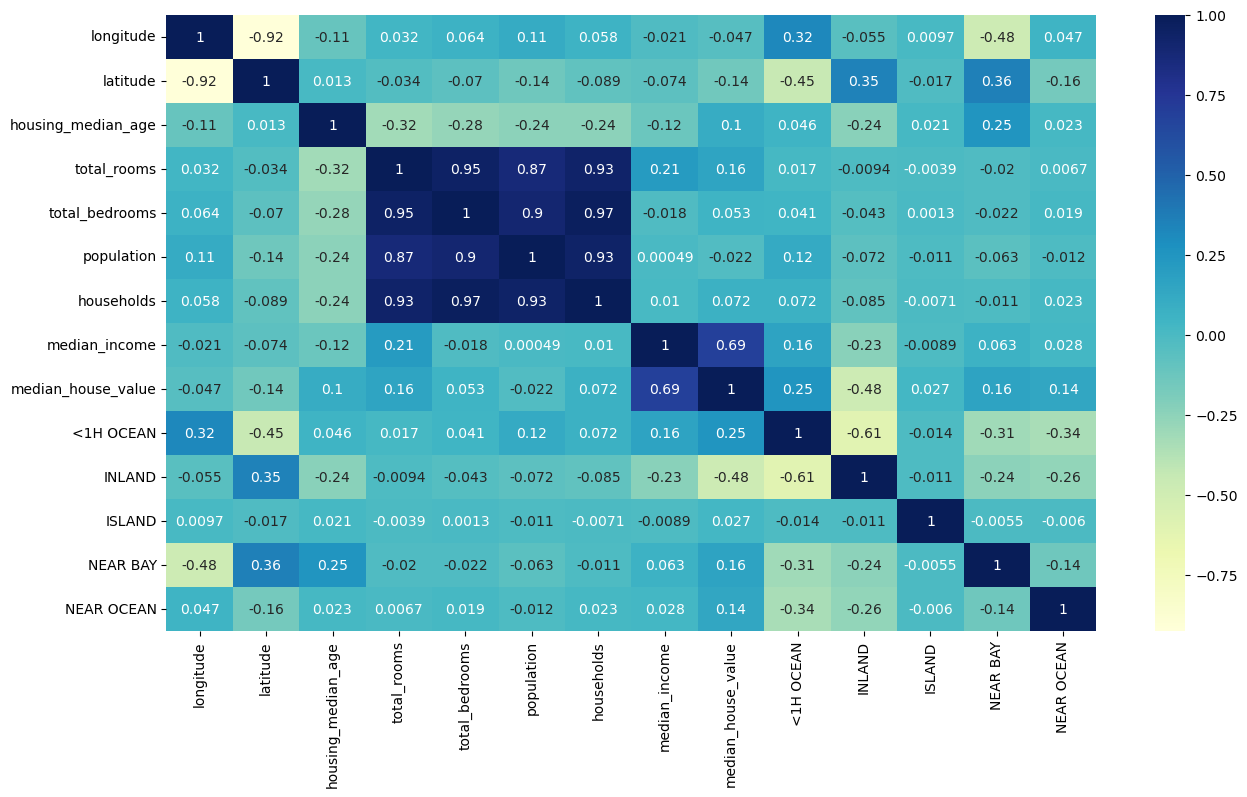

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

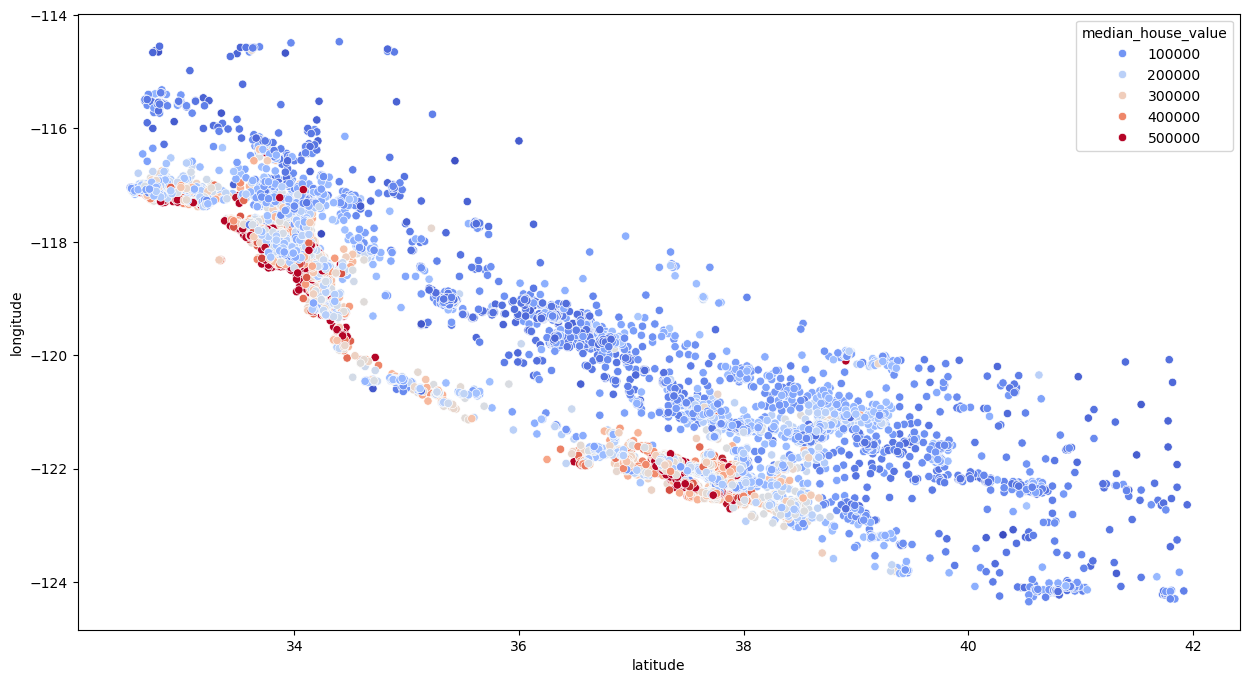

In [33]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

## Feature Engineering
- We create new features based on existing ones to provide more information to our model.
---

In [34]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

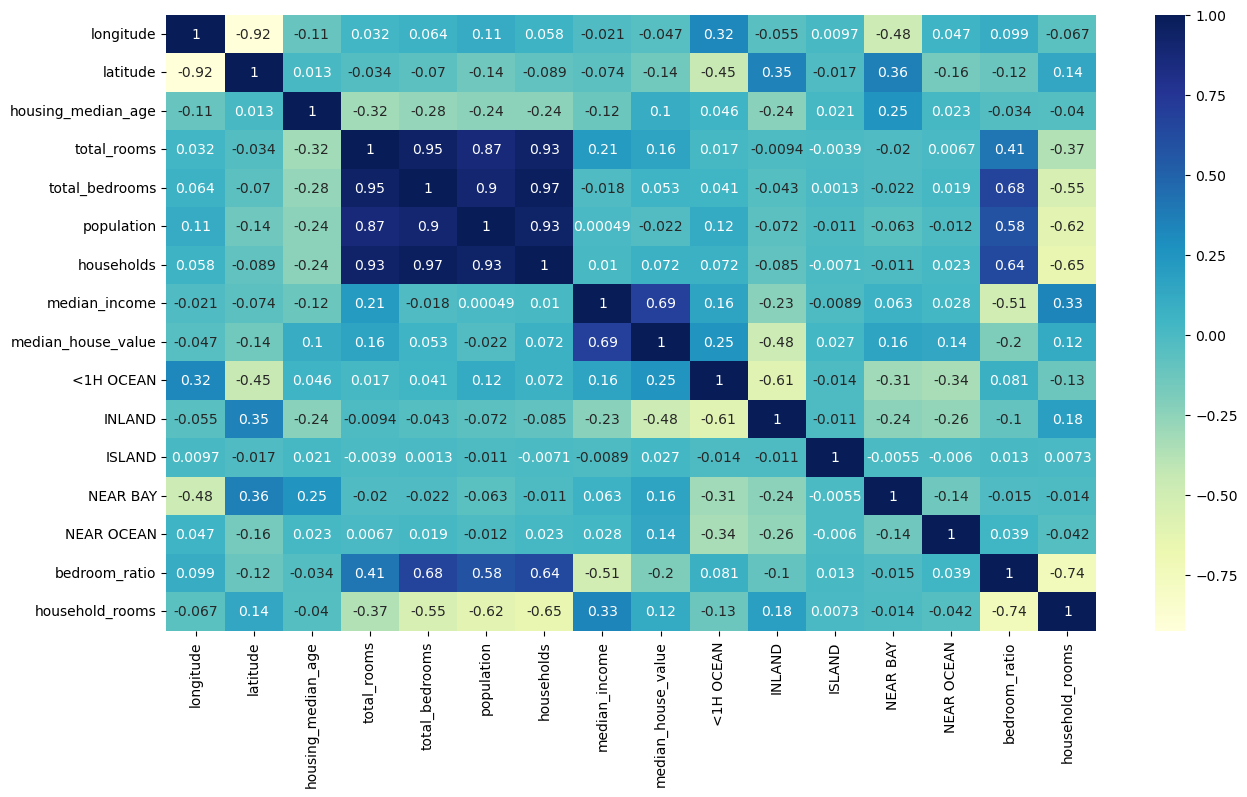

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Initial Model: Linear Regression
- We start with a simple Linear Regression model.
---

### Scaling the Features
- We scale the features using StandardScaler.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)




### Training the Model
- We train the Linear Regression model on the scaled training data.

In [37]:
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

### Preparing Test Data
- We preprocess the test data similarly to the training data.

In [38]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


### Evaluating Linear Regression
- We evaluate the Linear Regression model on the test data.

In [39]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
X_test_s = scaler.transform(X_test)

reg.score(X_test_s, y_test)

0.6790534918823403

## Improved Model: Random Forest Regressor
- Finally, we try a more advanced model, the Random Forest Regressor.


### Training the Random Forest Model

- We train the Random Forest model on the scaled training data.

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)


RandomForestRegressor()

### Evaluating the Random Forest Model
- We evaluate the Random Forest model on the test data.

In [41]:
forest.score(X_test_s, y_test)

0.831160607557853

## Conclusion
--- 

1.	**Data Preprocessing**:
	-	Essential for normalizing skewed distributions and encoding categorical variables.
	-	Improved the suitability of the data for linear models.

2.	**Feature Engineering**:
	-	Creating new features like bedroom_ratio and household_rooms added valuable information, enhancing model performance.

3.	**Model Evaluation**:
	-	Splitting data before EDA and preprocessing prevented data leakage, ensuring unbiased evaluation.
	-	Linear Regression provided a baseline; Random Forest Regressor improved accuracy, demonstrating the benefits of complex models.

4.	**Exploratory Data Analysis (EDA)**:
	-	Guided feature selection and engineering through understanding feature-target relationships.
	-	Data visualization revealed underlying data patterns.
	
5.	**Model Performance**:
	-	Linear Regression was simple but limited.
	-	Random Forest Regressor captured non-linear relationships, offering better performance.

### Future Work

-	**Hyperparameter Tuning**: Optimize model performance by tuning parameters.

-	**Additional Features**: Include more relevant features like proximity to amenities.

-	**Advanced Models**: Experiment with Gradient Boosting, XGBoost, or deep learning.

-	**Cross-Validation**: Ensure robustness and generalizability with cross-validation.

-	**Current Data**: Use recent datasets for more relevant predictions.

### Overall Takeaway

This project highlights the importance of data preprocessing, EDA, feature engineering, and the advantages of complex models for building effective machine learning predictors.